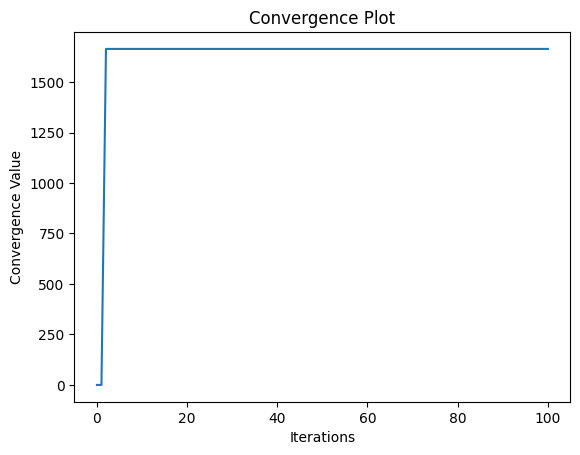

In [4]:
import random
import matplotlib.pyplot as plt


class HillClimbing:
    def __init__(self, capacity, weights, profits, iterations):
        self.capacity = capacity
        self.weights = weights
        self.profits = profits
        self.iterations = iterations

    def generate_random_solution(self):

        # First of all, randomly generate a solution
        return [random.randint(0, 1) for _ in range(len(self.weights))]

    def calculate_fitness(self, solution):

        # Return total profit if total_weight <= self.capacity
        total_weight = sum(solution[i] * self.weights[i]
                           for i in range(len(self.weights)))
        total_profit = sum(solution[i] * self.profits[i]
                           for i in range(len(self.profits)))

        return total_profit if total_weight <= self.capacity else 0

    def hill_climbing(self):

        # Hill Climbing Algorithm
        # randomly generate a solution
        current_solution = self.generate_random_solution()
        # calculate its total profit
        current_fitness = self.calculate_fitness(current_solution)

        convergence_values = [current_fitness]

        # iteration = 100
        for _ in range(self.iterations):

            neighbor_solution = current_solution[:]
            index_to_change = random.randint(0, len(neighbor_solution) - 1)
            neighbor_solution[index_to_change] = 1 - \
                neighbor_solution[index_to_change]

            # calculate neighbor's total profit
            neighbor_fitness = self.calculate_fitness(neighbor_solution)

            # update if it is better
            if neighbor_fitness > current_fitness:
                current_solution = neighbor_solution
                current_fitness = neighbor_fitness

            # collect the convergence values
            convergence_values.append(current_fitness)

        return convergence_values


def plot_convergence(convergence_values):

    # Charting the Concessions
    plt.plot(range(len(convergence_values)), convergence_values)
    plt.xlabel('Iterations')
    plt.ylabel('Convergence Value')
    plt.title('Convergence Plot')
    plt.show()


def main():
    capacity = 170
    weights = [41, 50, 49, 59, 55, 57, 60]
    profits = [442, 525, 511, 593, 546, 564, 617]
    iterations = 100

    # Hill Climbing algorithm
    hc = HillClimbing(capacity, weights, profits, iterations)
    convergence_values = hc.hill_climbing()
    # Charting the Concessions
    plot_convergence(convergence_values)


if __name__ == "__main__":
    main()